In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
diabetes = load_diabetes()
X_train, X_val, y_train, y_val = train_test_split(diabetes.data, diabetes.target, random_state=0)
model = Ridge(alpha=1e-2).fit(X_train, y_train)
model.score(X_val, y_val)

0.3566675322939421

In [2]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_val, y_val,n_repeats=30,random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{diabetes.feature_names[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
        f" +/- {r.importances_std[i]:.3f}")

s5      0.204 +/- 0.050
bmi     0.176 +/- 0.048
bp      0.088 +/- 0.033
sex     0.056 +/- 0.023


In [3]:
def calculate_permutation_importance(model, X_val, y_val, feature_list, n_repeats=30, random_state=0):
    from sklearn.inspection import permutation_importance
    result = permutation_importance(
        model, X_val, y_val, 
        n_repeats=n_repeats, 
        random_state=random_state, 
        n_jobs=-1  # 使用所有可用的CPU核心
    )
    
    importance_data = {
        "features": feature_list,
        "importance_mean": result.importances_mean,
        "importance_std": result.importances_std
    }
    
    df_importance = pd.DataFrame(importance_data)
    
    df_importance.sort_values(by="importance_mean", ascending=False, inplace=True)
    return df_importance

In [12]:
def plot_permutation_importance(df_importance):
    sns.set(style="whitegrid")

    plt.figure(figsize=(10, 8))
    barplot = plt.bar(
        df_importance['features'], 
        df_importance['importance_mean'], 
        yerr=df_importance['importance_std'], 
        capsize=5, 
        color='skyblue',  
        error_kw={'capthick': 2, 'elinewidth': 2}  
    )

    plt.title('Feature Permutation Importance with Standard Deviation')
    plt.xlabel('Features')
    plt.ylabel('Permutation Importance')

    plt.xticks(rotation=45, ha="right")

    plt.tight_layout()
    plt.show()

In [13]:
df_importance = calculate_permutation_importance(model, X_val, y_val, diabetes.feature_names, n_repeats=500, random_state=0)

In [7]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [9]:
import pandas as pd

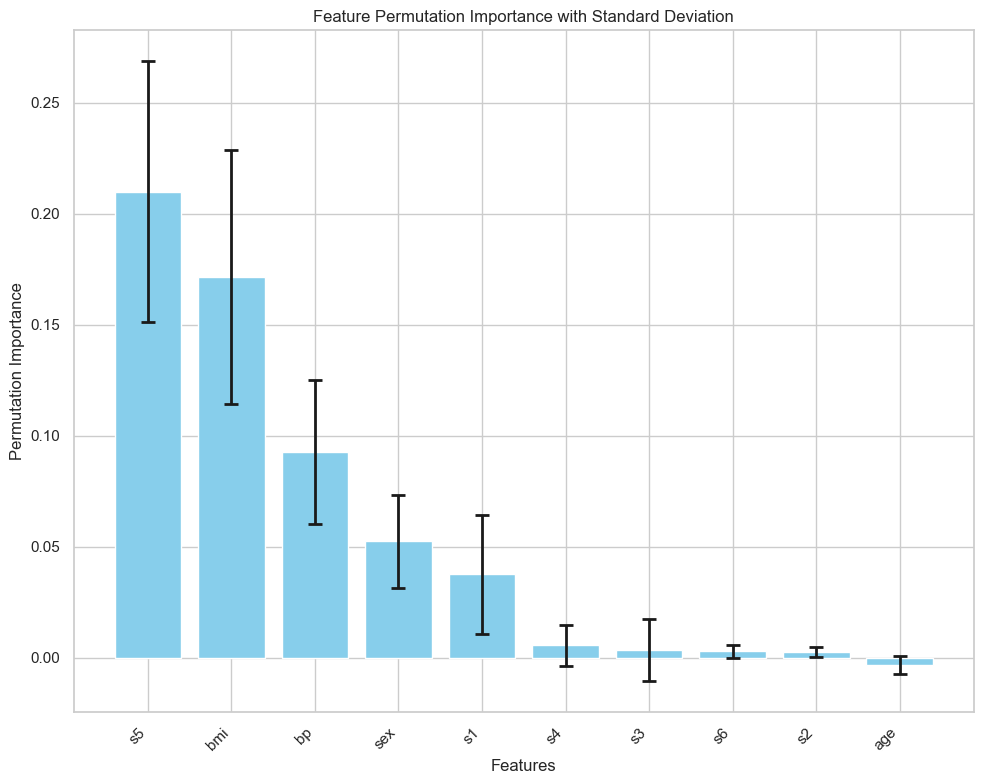

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plot_permutation_importance(df_importance)

In [16]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier

# 加载示例数据
data = load_iris()
X, y = data.data, data.target

# 决策树
tree = DecisionTreeClassifier()
tree.fit(X, y)
print("Decision Tree Feature Importances:", tree.feature_importances_)

# 随机森林
rf = RandomForestClassifier()
rf.fit(X, y)
print("Random Forest Feature Importances:", rf.feature_importances_)

# 梯度提升树
gbc = GradientBoostingClassifier()
gbc.fit(X, y)
print("Gradient Boosting Classifier Feature Importances:", gbc.feature_importances_)

# 极端随机树
et = ExtraTreesClassifier()
et.fit(X, y)
print("Extra Trees Classifier Feature Importances:", et.feature_importances_)


Decision Tree Feature Importances: [0.02666667 0.         0.05072262 0.92261071]
Random Forest Feature Importances: [0.10491511 0.01831347 0.42671382 0.45005759]
Gradient Boosting Classifier Feature Importances: [0.00692606 0.01164661 0.29098545 0.69044188]
Extra Trees Classifier Feature Importances: [0.09556628 0.05836782 0.38347245 0.46259346]


In [32]:
import numpy as np

            features  importance
0  petal length (cm)    1.813785
1   petal width (cm)    1.355478
2   sepal width (cm)    0.644269
3  sepal length (cm)    0.354022


/Users/xiaoyao/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


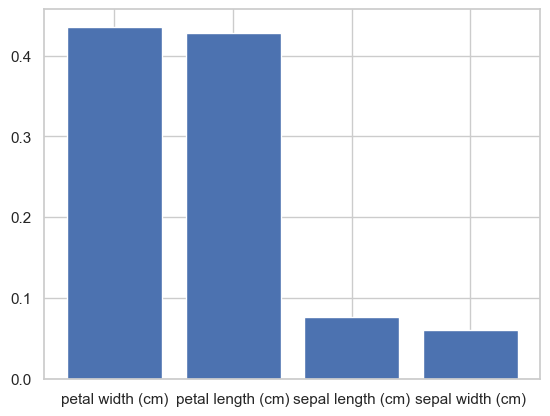

In [33]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor, ExtraTreesClassifier, ExtraTreesRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.datasets import load_iris

# 准备示例数据集
data = load_iris()
X, y = data.data, data.target
feature_names = data.feature_names

# 计算特征重要性的函数
def calculate_built_in_feature_importance(model, X, y, feature_names):
    model.fit(X, y)
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importance = np.abs(model.coef_[0]) if model.coef_.ndim == 1 else np.abs(model.coef_).mean(axis=0)
    else:
        return pd.DataFrame()  # 如果模型没有内置的特征重要性方法，则返回空DataFrame

    df_importance = pd.DataFrame({
        'features': feature_names,
        'importance': importance
    }).sort_values(by='importance', ascending=False).reset_index(drop=True)
    print(df_importance)
    plt.bar(df_importance_tree['features'],df_importance_tree['importance'])
    plt.show()
    return df_importance

tree_model = LogisticRegression()
df_importance_tree = calculate_built_in_feature_importance(tree_model, X, y, feature_names)


In [18]:
df_importance_tree

,features,importance
0,petal width (cm),0.922611
1,petal length (cm),0.050723
2,sepal length (cm),0.013333
3,sepal width (cm),0.013333


<BarContainer object of 4 artists>

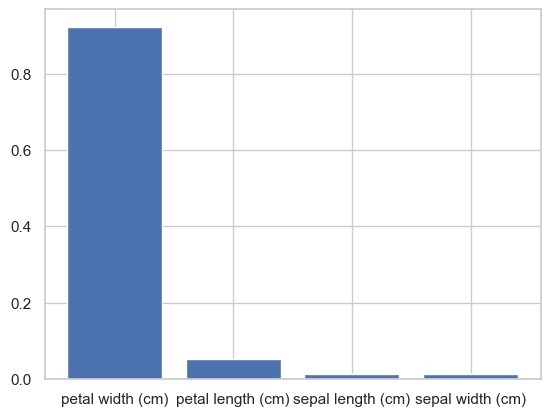

In [22]:
plt.bar(df_importance_tree['features'],df_importance_tree['importance'])

In [34]:
import shap
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 加载数据
data = load_iris()
X, y = data.data, data.target
feature_names = data.feature_names

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练一个XGBoost模型
model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
model.fit(X_train, y_train)

# 创建SHAP解释器
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# 可视化第一个预测的SHAP值
shap.plots.waterfall(shap_values[0], max_display=4)  # 显示前四个最重要的特征

AttributeError: module 'shap' has no attribute 'Explainer'